In [1]:

# performing linear algebra 
import numpy as np  
  
# data processing 
import pandas as pd 
  
# visualisation 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 
from sklearn.model_selection import validation_curve

In [2]:

dataset = pd.read_csv("class C.csv") 
print (dataset.head) 

<bound method NDFrame.head of       satisfaction_level  left  last_evaluation  number_project  \
0                   0.67     0             0.70               3   
1                   0.67     0             0.70               3   
2                   0.71     0             0.50               4   
3                   0.68     0             0.54               4   
4                   0.71     0             0.63               3   
...                  ...   ...              ...             ...   
7494                1.00     0             0.76               6   
7495                0.93     0             0.95               5   
7496                0.93     0             0.95               5   
7497                0.94     0             0.80               5   
7498                0.95     0             0.96               5   

      average_montly_hours  time_spend_company  Work_accident  \
0                      149                   3              0   
1                      149         

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7499 entries, 0 to 7498
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     7499 non-null   float64
 1   left                   7499 non-null   int64  
 2   last_evaluation        7499 non-null   float64
 3   number_project         7499 non-null   int64  
 4   average_montly_hours   7499 non-null   int64  
 5   time_spend_company     7499 non-null   int64  
 6   Work_accident          7499 non-null   int64  
 7   promotion_last_5years  7499 non-null   int64  
 8   Department             7499 non-null   object 
 9   salary                 7499 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 586.0+ KB


In [4]:
dataset.describe()

,satisfaction_level,left,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
count,7499.000000,7499.000000,7499.000000,7499.000000,7499.000000,7499.000000,7499.000000,7499.000000
mean,0.812311,0.130417,0.763606,3.909321,205.290172,3.547940,0.159088,0.042539
std,0.114183,0.336785,0.160277,0.919857,44.654240,1.621307,0.365782,0.201829
min,0.110000,0.000000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000
25%,0.740000,0.000000,0.630000,3.000000,167.000000,2.000000,0.000000,0.000000
50%,0.820000,0.000000,0.780000,4.000000,210.000000,3.000000,0.000000,0.000000
75%,0.900000,0.000000,0.900000,5.000000,244.000000,4.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000


<AxesSubplot:>

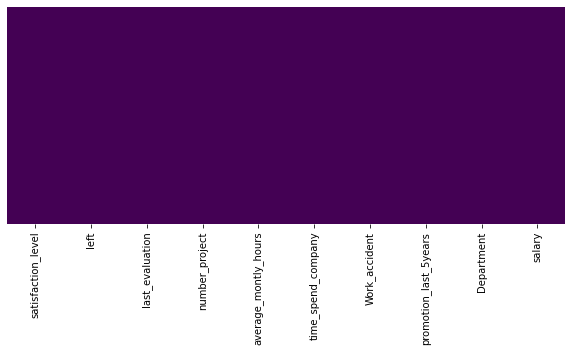

In [5]:
# heatmap to check the missing value 
plt.figure(figsize =(10, 4)) 
sns.heatmap(dataset.isnull(), yticklabels = False, cbar = False, cmap ='viridis')

<AxesSubplot:xlabel='left', ylabel='count'>

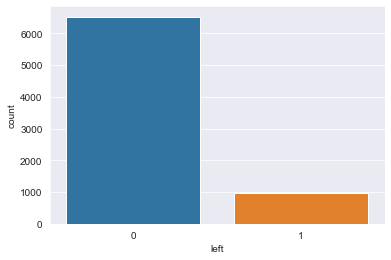

In [6]:
sns.set_style('darkgrid') 
sns.countplot(x ='left', data = dataset) 

In [7]:
y = dataset.iloc[:, 1] 
x = dataset 
x.drop('left', axis = 1, inplace = True) 


In [8]:
from sklearn.preprocessing import LabelEncoder 
lb = LabelEncoder() 
y = lb.fit_transform(y) 

In [9]:

dum_Department = pd.get_dummies(dataset['Department'],  
                                prefix ='Department') 
dum_salary = pd.get_dummies(dataset['salary'],  
                              prefix ='salary') 
# Adding these dummy variable to input X 
X = pd.concat([x,dum_Department, dum_salary], axis = 1) 
# Removing the categorical data 
X.drop(['Department', 'salary'],  
        axis = 1, inplace = True) 
  
print(X.shape) 
print(y.shape) 

(7499, 20)
(7499,)


In [10]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( 
    X, y, test_size = 0.2, random_state = 40)

In [11]:
from sklearn.neighbors import KNeighborsClassifier 
neighbors = []  
cv_scores = []  

In [12]:
from sklearn.model_selection import cross_val_score  
# perform 10 fold cross validation  
for k in range(1, 40, 2):  
    neighbors.append(k)  
    knn = KNeighborsClassifier(n_neighbors = k)  
    scores = cross_val_score(  
        knn, X_train, y_train, cv = 10, scoring = 'accuracy')  
    cv_scores.append(scores.mean()) 
error_rate = [1-x for x in cv_scores] 

The optimal number of neighbors is  1 


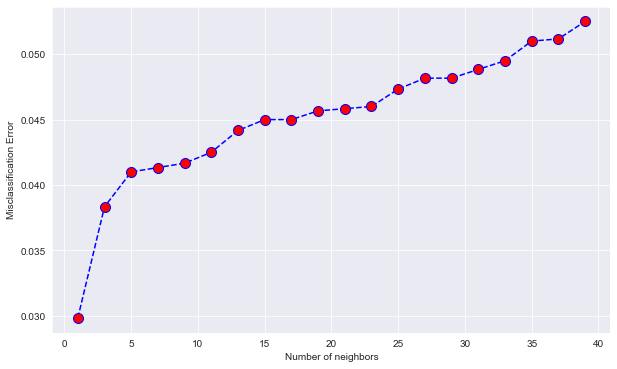

In [13]:
# determining the best k  
optimal_k = neighbors[error_rate.index(min(error_rate))]  
print('The optimal number of neighbors is % d ' % optimal_k)  
    
# plot misclassification error versus k  
plt.figure(figsize = (10, 6))  
plt.plot(range(1, 40, 2), error_rate, color ='blue', linestyle ='dashed', marker ='o', 
         markerfacecolor ='red', markersize = 10) 
plt.xlabel('Number of neighbors')  
plt.ylabel('Misclassification Error')  
plt.show() 

In [14]:
from sklearn.model_selection import cross_val_predict, cross_val_score 
from sklearn.metrics import accuracy_score, classification_report 
from sklearn.metrics import confusion_matrix 

In [15]:
 def print_score(clf, X_train, y_train, X_test, y_test, train = True): 
    if train: 
        print("Train Result:") 
        print("------------") 
        print("Classification Report: \n {}\n".format(classification_report( 
                y_train, clf.predict(X_train)))) 
        print("Confusion Matrix: \n {}\n".format(confusion_matrix( 
                y_train, clf.predict(X_train)))) 
  
        res = cross_val_score(clf, X_train, y_train,  
                              cv = 10, scoring ='accuracy') 
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res))) 
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res))) 
        print("accuracy score: {0:.4f}\n".format(accuracy_score( 
                y_train, clf.predict(X_train)))) 
        print("----------------------------------------------------------") 
                 
    elif train == False: 
        print("Test Result:") 
        print("-----------") 
        print("Classification Report: \n {}\n".format( 
                classification_report(y_test, clf.predict(X_test)))) 
        print("Confusion Matrix: \n {}\n".format( 
                confusion_matrix(y_test, clf.predict(X_test))))  
        print("accuracy score: {0:.4f}\n".format( 
                accuracy_score(y_test, clf.predict(X_test)))) 
        print("-----------------------------------------------------------") 
          
knn = KNeighborsClassifier(n_neighbors = 5) 
knn.fit(X_train, y_train) 
print_score(knn, X_train, y_train, X_test, y_test, train = True) 
print_score(knn, X_train, y_train, X_test, y_test, train = False) 

Train Result:
------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      5211
           1       0.87      0.94      0.90       788

    accuracy                           0.97      5999
   macro avg       0.93      0.96      0.94      5999
weighted avg       0.97      0.97      0.97      5999


Confusion Matrix: 
 [[5101  110]
 [  50  738]]

Average Accuracy: 	 0.9590
Accuracy SD: 		 0.0091
accuracy score: 0.9733

----------------------------------------------------------
Test Result:
-----------
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      1310
           1       0.85      0.92      0.88       190

    accuracy                           0.97      1500
   macro avg       0.92      0.95      0.93      1500
weighted avg       0.97      0.97      0.97      1500


Confusion Matrix: 
 [[1280   30]
 [  16  174]]

accuracy scor

In [16]:
#Predict the response for test dataset
y_pred = knn.predict(X_test)

In [17]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred))
# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9693333333333334
Precision: 0.8529411764705882
Recall: 0.9157894736842105


In [18]:
param_range = np.arange(1, 7, 1)

train_score, test_score = validation_curve(KNeighborsClassifier(), X, y, 
                                       param_name = "n_neighbors", 
                                       param_range = param_range, 
                                        cv = 10, scoring = "accuracy") 

In [19]:

mean_train_score = np.mean(train_score, axis = 1) 
std_train_score = np.std(train_score, axis = 1) 
mean_test_score = np.mean(test_score, axis = 1) 
std_test_score = np.std(test_score, axis = 1)

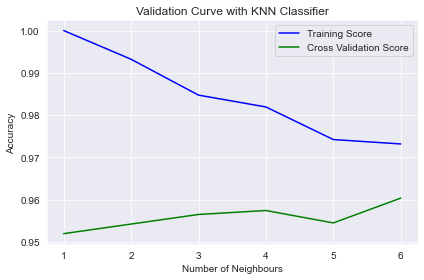

In [20]:
plt.plot(param_range, mean_train_score,  
     label = "Training Score", color = 'b') 
plt.plot(param_range, mean_test_score, 
   label = "Cross Validation Score", color = 'g') 
  
# Creating the plot 
plt.title("Validation Curve with KNN Classifier") 
plt.xlabel("Number of Neighbours") 
plt.ylabel("Accuracy") 
plt.tight_layout() 
plt.legend(loc = 'best') 
plt.show()